In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# windows 용 한글 폰트 오류 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

# 선 그래프

In [44]:
df = pd.read_excel("./data/시도별 전출입 인구수.xlsx")

In [45]:
df.shape # 325행 50열

(325, 50)

In [46]:
df.dtypes # 똥내나는 슬픈 이야기...

전출지별    object
전입지별    object
1970    object
1971    object
1972    object
1973    object
1974    object
1975    object
1976    object
1977    object
1978    object
1979    object
1980    object
1981    object
1982    object
1983    object
1984    object
1985    object
1986    object
1987    object
1988    object
1989    object
1990    object
1991    object
1992    object
1993    object
1994    object
1995    object
1996    object
1997    object
1998    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
dtype: object

- 엑셀 파일에서 병합된 셀을 데이ㅓㅌ 프레임에서 변환 할 때 적절한 값을 찾지 못해 전출지별 열에 결측지 발생
- 누락데이터 앞 행의 데이터로 채워야함

In [39]:
# ffill 로 전출지를 입력하면 되것다...
df = df.ffill()
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [32]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리

In [40]:
df_seoul = df[(df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")]

In [34]:
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [41]:
df_seoul = df_seoul.drop("전출지별", axis = 1) # 열에서 전출지별 컬럼 삭제 ( 필요없음 )

In [47]:
df_seoul  = df_seoul.rename({"전입지별" : "전입지"}, axis = 1)

In [48]:
df_seoul = df_seoul.set_index("전입지")

In [49]:
df_seoul.index

Index(['전국', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지')

In [50]:
sr_gy = df_seoul.loc["경기도"]
sr_gy.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

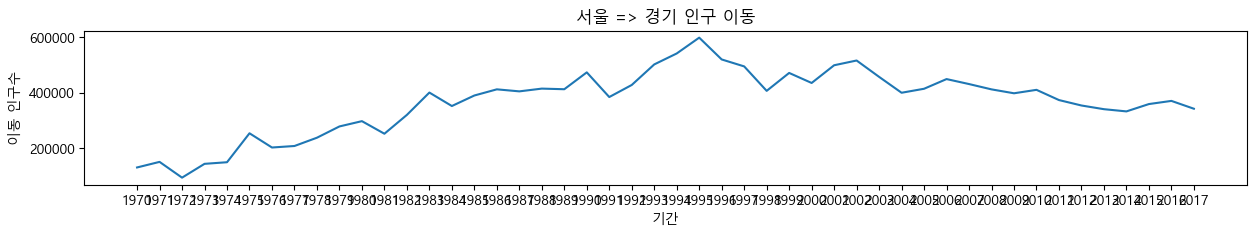

In [52]:
# 시리즈의 인덱스를 x 축 ,값을 y 축으로 선 그래프 그리기

plt.plot(sr_gy)
plt.title("서울 => 경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("이동 인구수")

plt.show()

## 그래프 꾸미기

- 눈금 라벨이 들어갈 충분한 여유공간이 없으면 글씨가 겹치는 문제가 발생

- 문제 해결을 위한 방법
    - 그래프의 가로 사이즈를 더 크게 설정
    - xticks()로 x축 눈금 라벨을 90도 회전시켜서 글씨가 겹치지 않게 하기

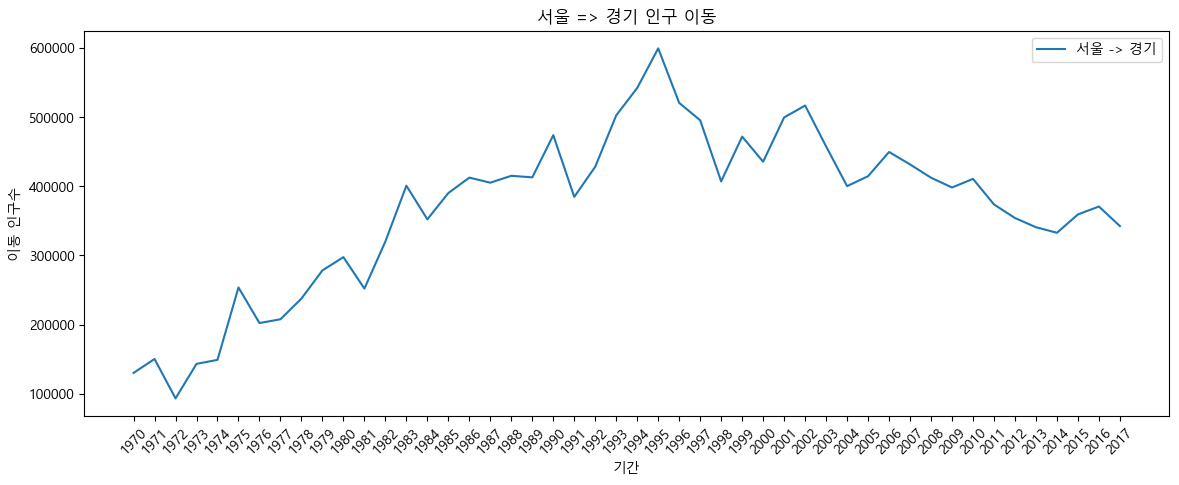

In [61]:
plt.figure(figsize=(14,5))

plt.plot(sr_gy)

plt.title("서울 => 경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("이동 인구수")
plt.legend(labels = ["서울 -> 경기"])

plt.xticks(rotation = 45) # 눈금을 돌려 버려라~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!!!!!!!!!!!!!!!!!!!!!!!!!!!

plt.show()

### 이쁜이 작업

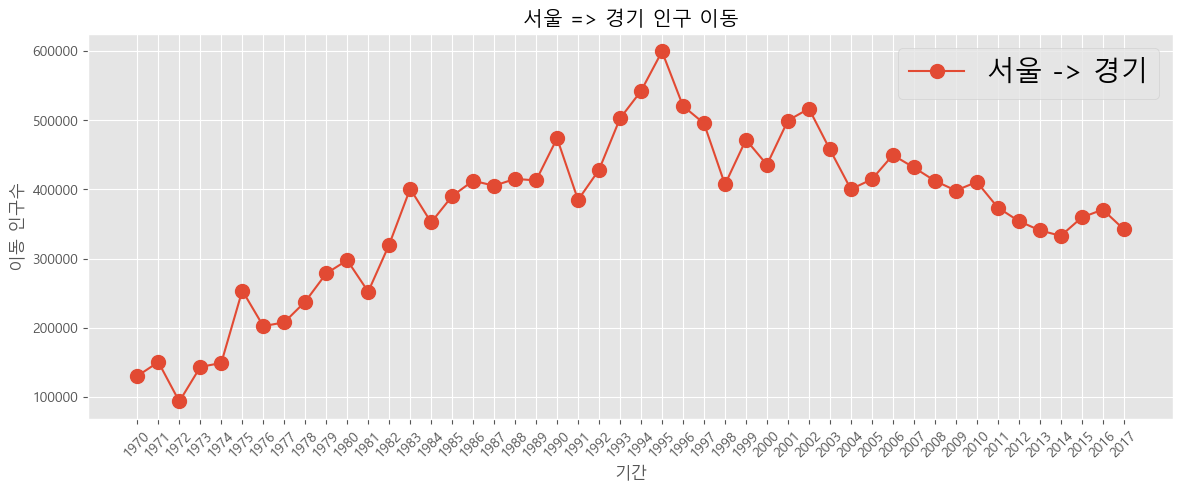

In [70]:
plt.style.use("ggplot")

plt.figure(figsize=(14,5))

plt.plot(sr_gy, marker = "o", markersize = 10) # ppt 작업할때 잘보이게

plt.title("서울 => 경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("이동 인구수")

plt.legend(labels = ["서울 -> 경기"], fontsize = 20)

plt.xticks(rotation = 45) # 눈금을 돌려 버려라~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!!!!!!!!!!!!!!!!!!!!!!!!!!!

plt.show()

C:\Users\ITSC\AppData\Local\Temp\ipykernel_3504\2657772548.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sr_gy.index, rotation = 75)


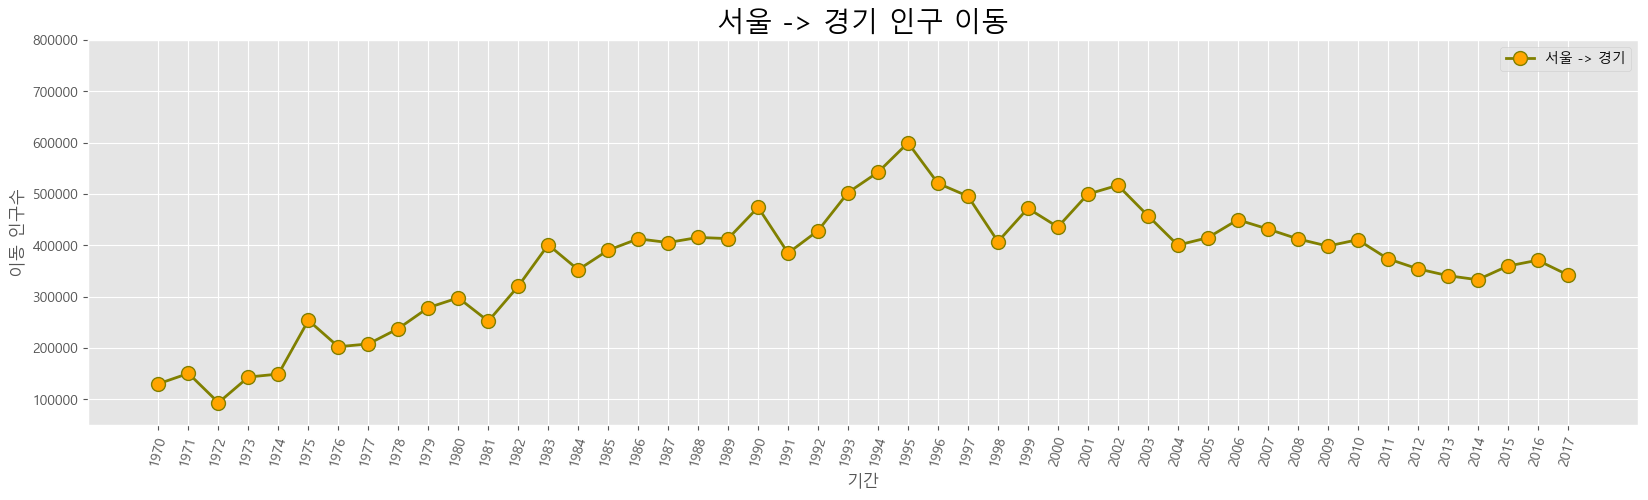

In [74]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)
#그래프 출력
ax.plot(
    sr_gy, 
    marker = "o",
    markerfacecolor = "orange", 
    markersize = 10, 
    color = "olive",
    linewidth = 2, 
    label = "서울 -> 경기"
       )
ax.legend()
# y 축 범위 지정
ax.set_ylim(50000, 800000)

# 차트 제목
ax.set_title("서울 -> 경기 인구 이동", size = 20)

# 축 이름 추가
ax.set_xlabel("기간", size = 12)
ax.set_ylabel("이동 인구수", size = 12)

# 축 눈금라벨 지정 및 회전
ax.set_xticklabels(sr_gy.index, rotation = 75)

ax.tick_params(axis ="both", labelsize = 10)
plt.show()

###  서울에서 충남,경북, 강원 인구이동

In [163]:
df = pd.read_excel("./data/시도별 전출입 인구수.xlsx")

# 망했다 판다스 왜 까먹어
df_3 = df_seoul.loc[["충청남도","경상북도", "강원도"]]

In [124]:
df = df.ffill()

In [150]:
df_3.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [144]:
df["전입지별"].unique()

array(['전입지별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

C:\Users\ITSC\AppData\Local\Temp\ipykernel_3504\507687935.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_3.columns, rotation = 90, )


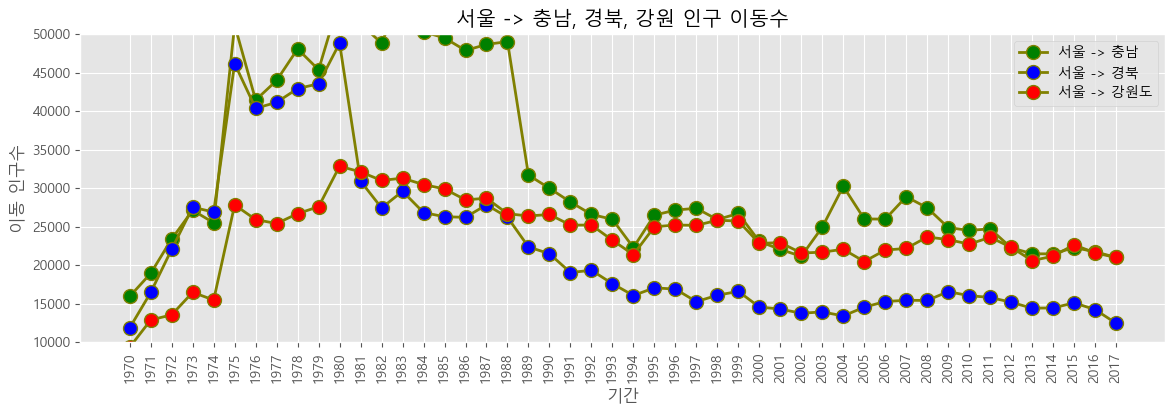

In [168]:
fig = plt.figure(figsize = (14, 4))
ax = fig.add_subplot(1, 1, 1)


#그래프 출력
ax.plot(
    df_3.loc["충청남도"], # 여기에 시리즈가 들어간다는 것이다~ 아악!!!!!아아아아아악!!!!!!
    marker = "o",
    markerfacecolor = "green", 
    markersize = 10, 
    color = "olive",
    linewidth = 2, 
    label = "서울 -> 충남"
)
ax.plot(
    df_3.loc["경상북도"], 
    marker = "o",
    markerfacecolor = "blue", 
    markersize = 10, 
    color = "olive",
    linewidth = 2, 
    label = "서울 -> 경북"
)
ax.plot(
    df_3.loc["강원도"], 
    marker = "o",
    markerfacecolor = "red", 
    markersize = 10, 
    color = "olive",
    linewidth = 2, 
    label = "서울 -> 강원도"
)

ax.legend()
# y 축 범위 지정
ax.set_ylim(10000, 50000)

# 차트 제목
ax.set_title("서울 -> 충남,경북,강원 인구 이동", size = 10)

# 축 이름 추가
ax.set_xlabel("기간", size = 12)
ax.set_ylabel("이동 인구수", size = 12)

# 축 눈금라벨 지정 및 회전
ax.set_xticklabels(df_3.columns, rotation = 90, )

ax.tick_params(axis ="both", labelsize = 10)

ax.set_title("서울 -> 충남, 경북, 강원 인구 이동수")
plt.show()

- 지리적으로 가까운 충남지역으로 이동한 인구가 다른 두 지역에 비해 많은 편

- 70~ 80년대에는 서울에서 지방으로 전출하는 인구가 많았으나 90년 이후로는 감소하는 패턴을 보임

## 면적 그래프(area plot)

- 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x 축 사이의 공간에 색이 입혀짐

In [172]:
df_4 = df_seoul.loc[["충청남도","경상북도","강원도","전라남도"]]
df_4 = df_4.T
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


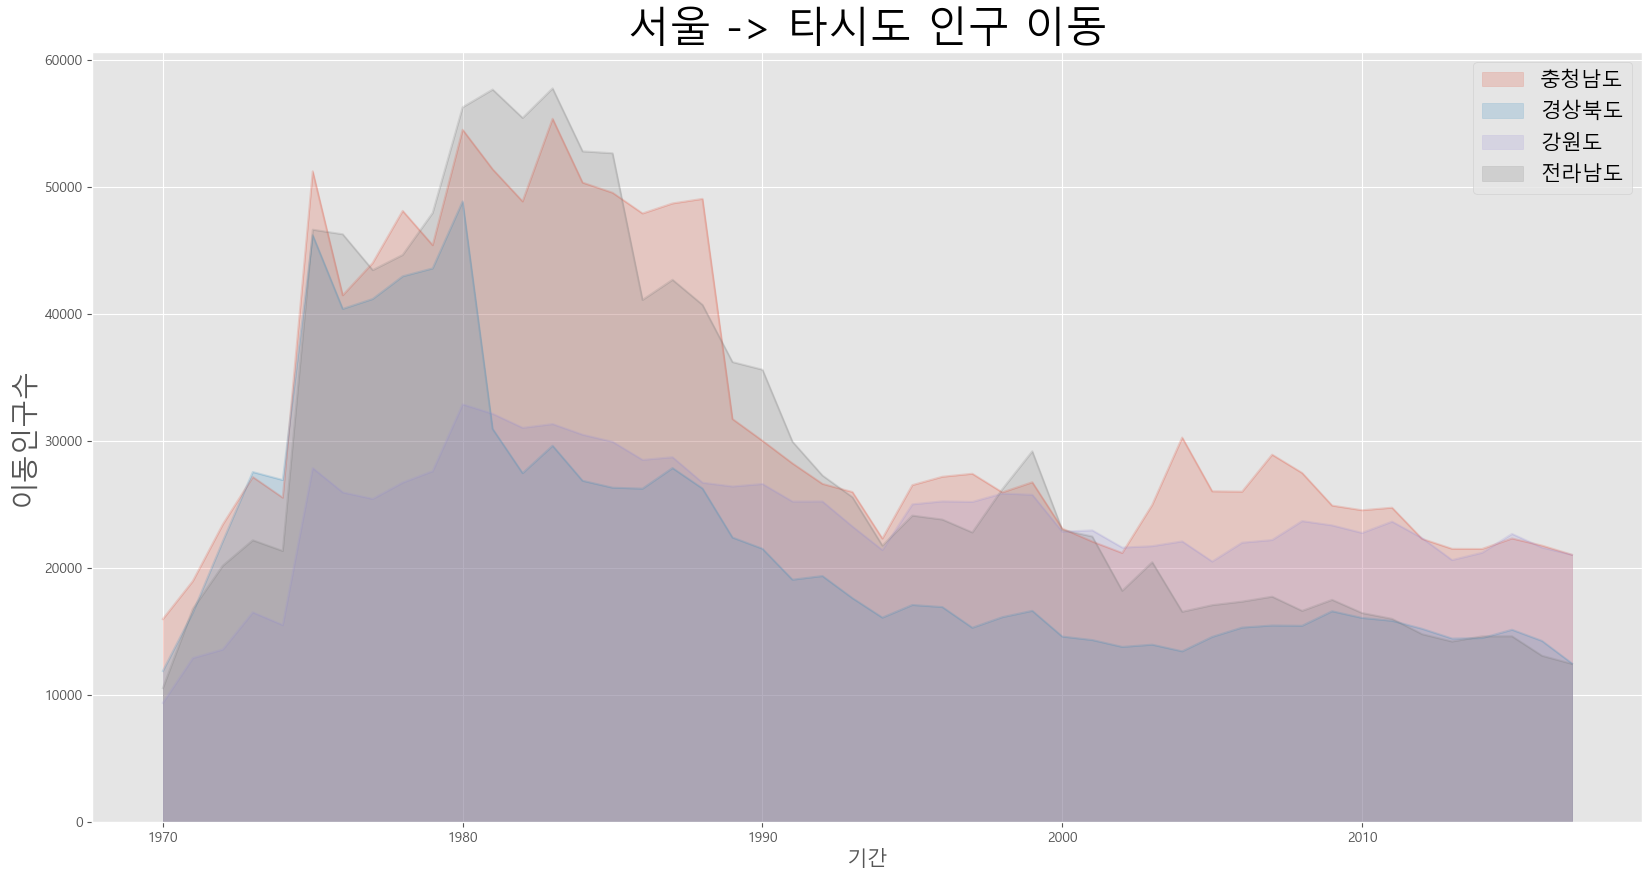

In [177]:
# 면적 그래프 그리기
df_4.plot(
    kind = "area", 
    alpha = 0.2, 
    figsize = (20,10), 
    stacked = False, 
)

plt.title("서울 -> 타시도 인구 이동", size = 30)
plt.ylabel("이동인구수", size = 20)
plt.xlabel("기간", size = 15)

plt.legend(fontsize =15)
plt.show()

In [174]:
# 선 그래프와 차이점은 없지만 
# 선은 연속된 데이터에 집중을 함
# 면적그래프는 양 데이터에 집중을 함...!

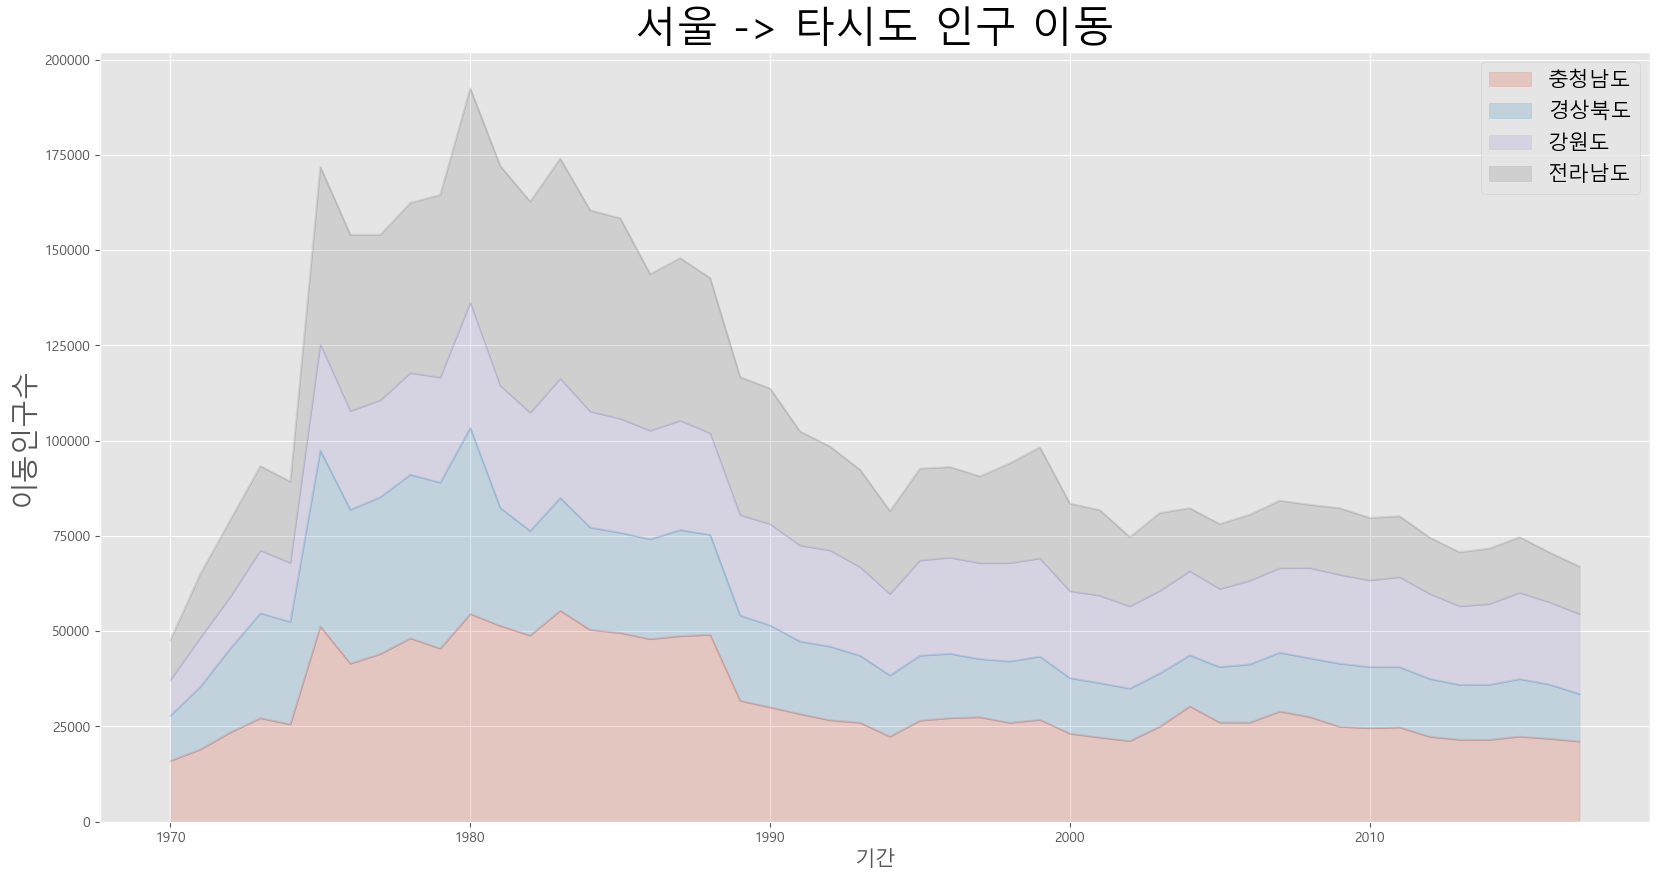

In [178]:
# 면적 그래프 그리기
df_4.plot(
    kind = "area", 
    alpha = 0.2, 
    figsize = (20,10), 
    stacked = True, # y축으로 쌓아서 보여줌(총량을 보여주기 위함)
)

plt.title("서울 -> 타시도 인구 이동", size = 30)
plt.ylabel("이동인구수", size = 20)
plt.xlabel("기간", size = 15)

plt.legend(fontsize =15)
plt.show()

## 막대 그래프(bar plot)

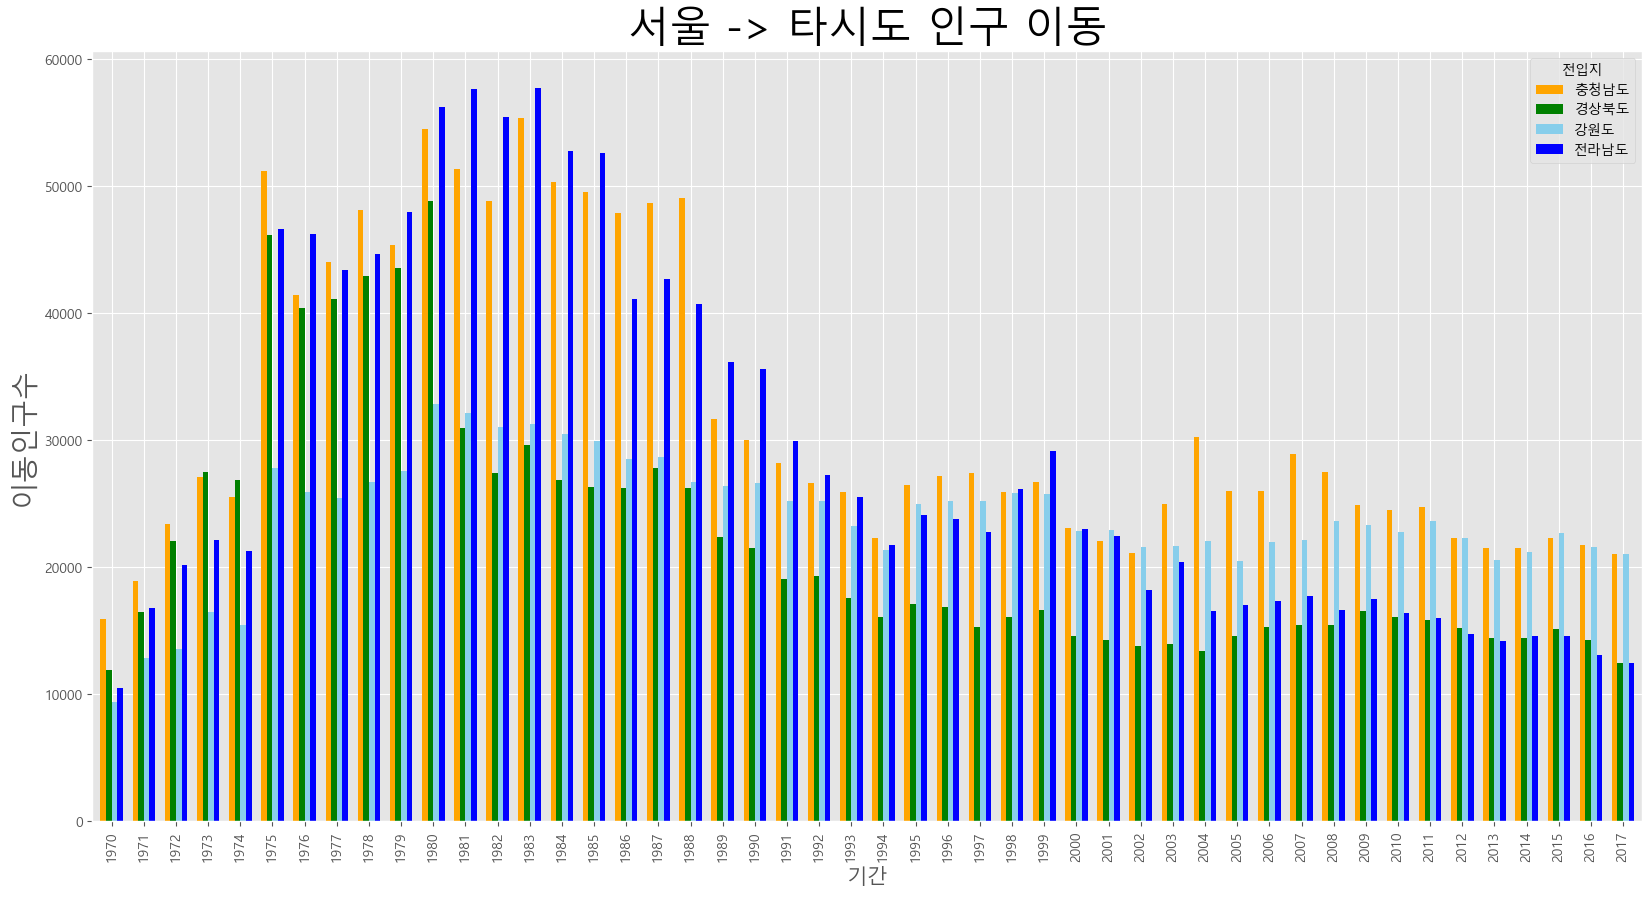

In [181]:

df_4.plot(
    kind = "bar",
    figsize = (20, 10),
    width =0.7,
    color = [
        "orange",
        "green",
        "skyblue",
        "blue",
    ]

)

plt.title("서울 -> 타시도 인구 이동", size = 30)
plt.ylabel("이동인구수", size = 20)
plt.xlabel("기간", size = 15)

plt.show() # 눈깔이 아프다

In [182]:
# 막대그래프는 여러개일때는 사용하는게 아니다
# 눈이 피로하다

In [189]:
df_4

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


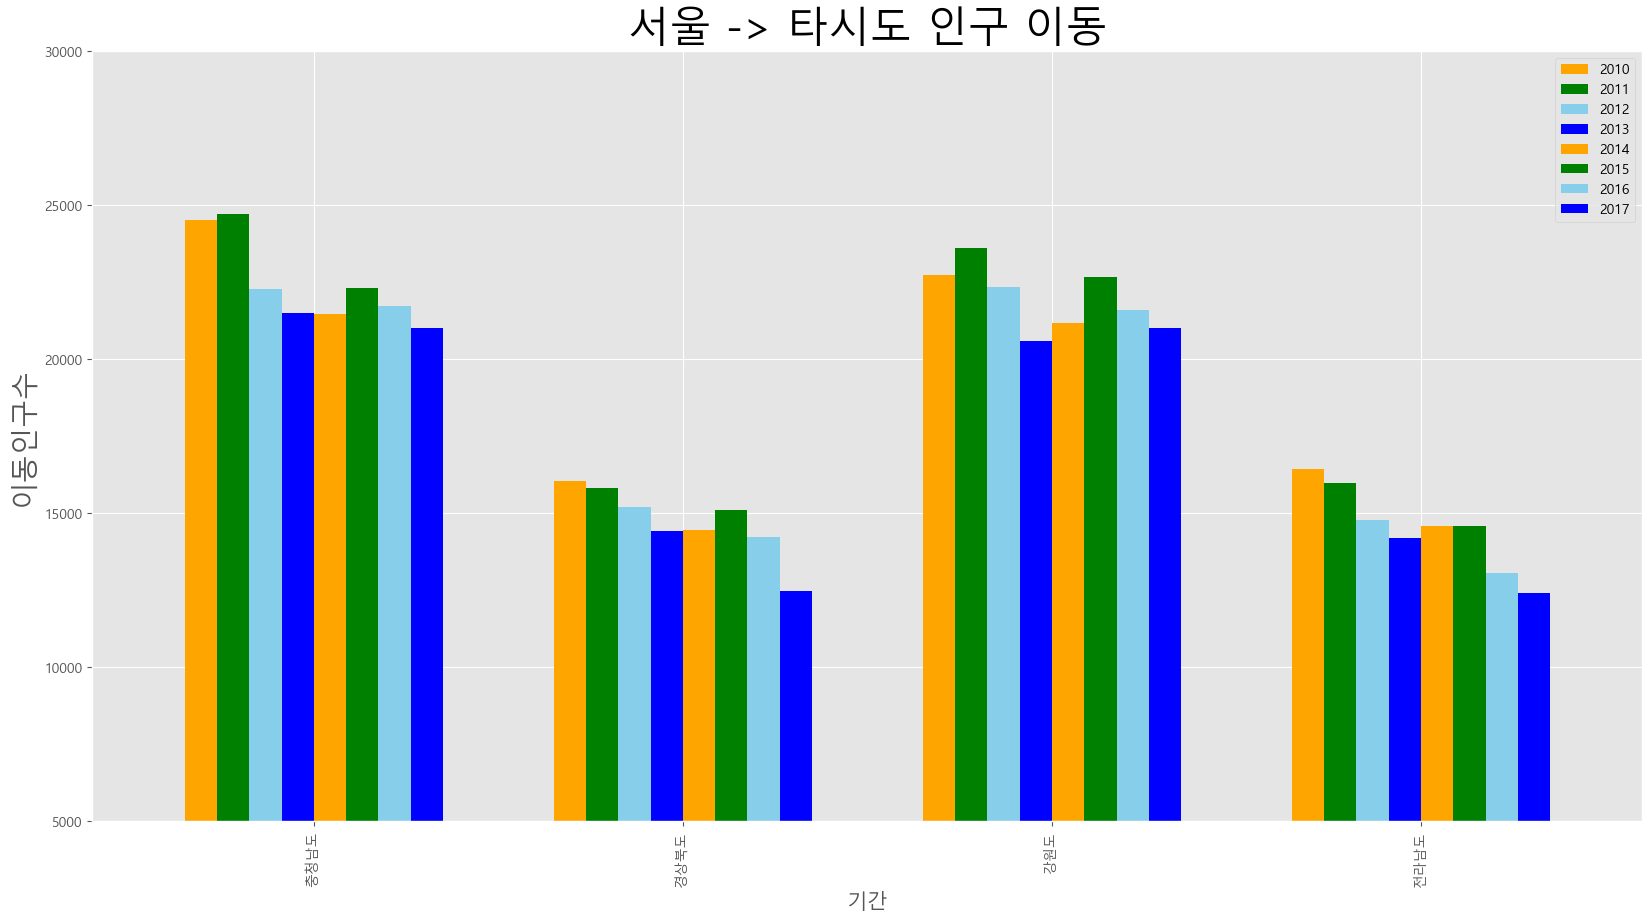

In [187]:
# 데이터를 줄이는 작업~
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[["충청남도","경상북도","강원도","전라남도"], col_years]

df_4.plot(
    kind = "bar",
    figsize = (20, 10),
    width =0.7,
    color = [
        "orange",
        "green",
        "skyblue",
        "blue",
    ]

)
plt.ylim(5000,30000)
plt.title("서울 -> 타시도 인구 이동", size = 30)

plt.ylabel("이동인구수", size = 20)
plt.xlabel("기간", size = 15)

plt.show() # 눈깔이 아프다

In [192]:
df_4  = df_4.T

In [193]:
df_4

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [194]:
# 2010 ~ 2017년 이동 인구 수를 합계하여 새로운 열로 추가

In [196]:
df_4["합계"] = df_4.sum(axis = 1)

In [197]:
df_4

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035


In [202]:
# 가장 큰값부터
df_total = df_4.sort_values("합계",ascending = True)
df_total

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533


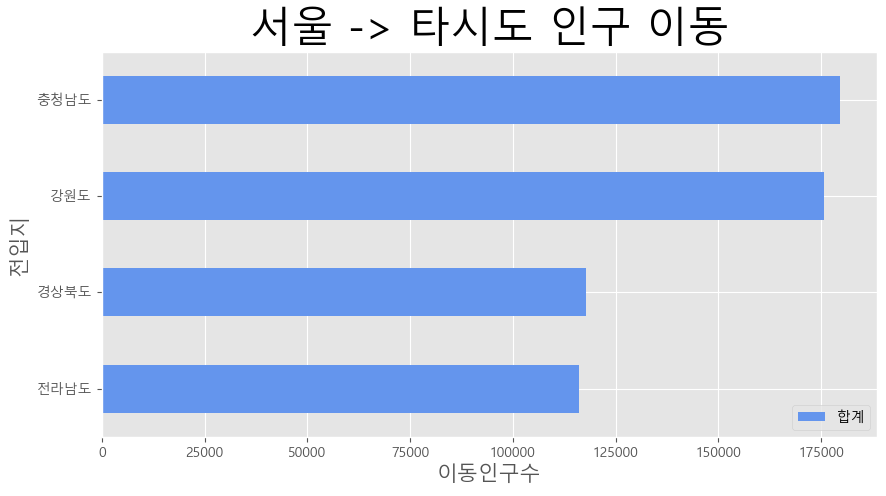

In [205]:
# 수평 막대 그래프
df_total["합계"].plot(
    kind = "barh", 
    color = "cornflowerblue", 
    width = 0.5, 
    figsize = (10,5)
)

plt.title("서울 -> 타시도 인구 이동", size = 30)

plt.xlabel("이동인구수", size = 15)
plt.ylabel("전입지", size = 15)
plt.legend()

plt.show()

- 있어벨러티를 위해서 보조축을 한번 사용해보자

### 보조 축 활용
- 보조 축을 추가하여 2개의 y 축을 갖는 그래프 그리기

In [223]:
df = pd.read_excel("./data/남북한발전전력량.xlsx")

In [224]:
df.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [225]:
df = df.ffill()

In [226]:
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [227]:
df = df.iloc[5:]

In [228]:
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [229]:
df.columns

Index(['전력량 (억㎾h)', '발전 전력별', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [230]:
df = df.drop("전력량 (억㎾h)", axis = 1)
df = df.set_index("발전 전력별")
df = df.T

In [231]:
df

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [232]:
# 얼마나 성장했는지 / 증감률

In [245]:
# 시계열 데이터

df = df.rename(columns = {"합계": "총발전량"})

In [234]:
df.head()

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [236]:
df["총발전량 - 1년"] = df["총발전량"].shift(1) 
# 한칸 땡김 0행을 1행으로 내리고 ...
# 마지막 값은 없어진다요

In [237]:
df

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년
1990,277,156,121,-,None
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221
1995,230,142,88,-,231
1996,213,125,88,-,230
1997,193,107,86,-,213
1998,170,102,68,-,193
1999,186,103,83,-,170


In [241]:
# (df["총발전량"]/ df["총발전량 - 1년"]) => 변화한 비율을 계산한다

df["증감률"]=((df["총발전량"]/ df["총발전량 - 1년"]) -1)* 100  # 변화량 1을 빼고 백분율로 변환 

In [242]:
df

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감률
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


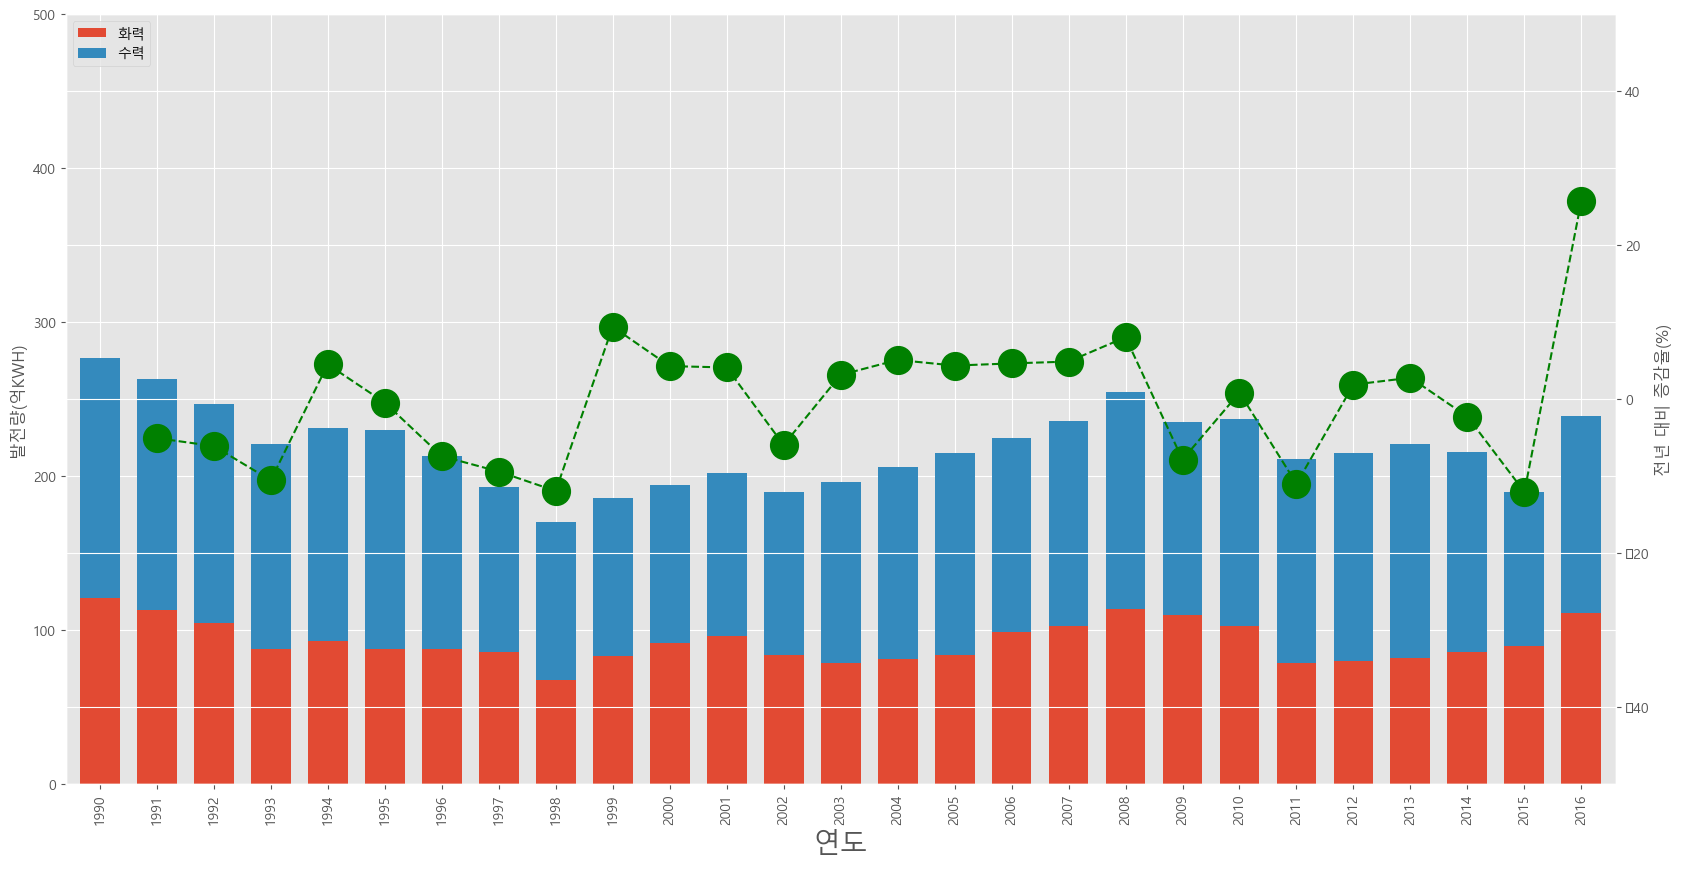

In [247]:
# 단위가 달라서 y 축 보조축이 필요하다

# 2축 그래프 그리기

ax1 = df[["화력","수력"]].plot(
    kind = "bar",
    figsize = (20,10),
    width = 0.7,
    stacked = True
)

ax2 = ax1.twinx() # 원래 주어진 axis , x 를 공유하는 쌍둥이 축

ax2.plot(
    df["증감율"],
    ls = "--",
    marker = "o",
    markersize = 20,
    color = "green",
    label = "전년대비 증감율(%)"
)

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel("연도", size =20)
ax1.set_ylabel("발전량(억KWH)")
ax2.set_ylabel("전년 대비 증감율(%)")
ax1.legend(loc = "upper left")
plt.show()

## 산점도

In [3]:
df = pd.read_csv("./data/auto-mpg.csv", header = None, names = ["mpg", "cylinders","displacement","horsepower","weight","acceleration","model_year","origin","name"])

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


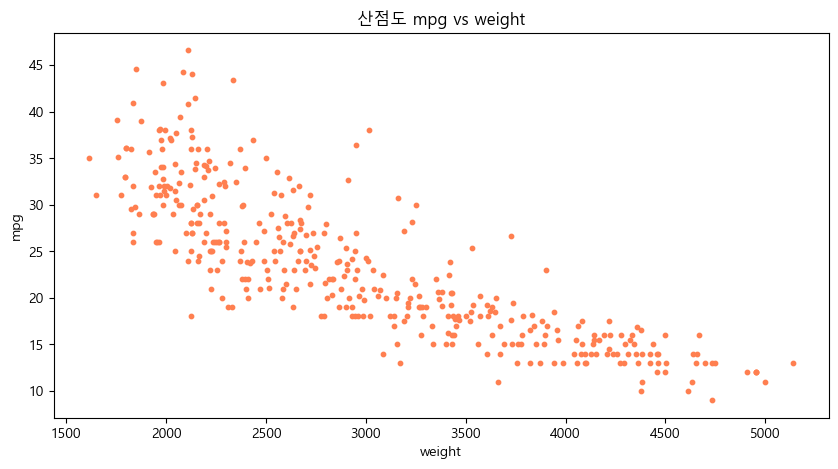

In [9]:
# 연비(mpg)와 차중(weight) 열에 대한 산점도
df.plot(
    kind ="scatter", 
    x = "weight",
    y = "mpg", 
    c = "coral", 
    s = 10, 
    figsize = (10,5)
)
plt.title("산점도 mpg vs weight")
plt.show()

In [10]:
# 연비가 안좋을수록 무게가 무겁구나!

In [23]:
df["cylinders"].unique() # 이산형데이터의 고유값을 찍어보자
# 값이 거기서 거기라 표에는 잘 표현이 안됨! 
# 정규화를 진행해야한다~

array([8, 4, 6, 3, 5])

In [18]:
# cylinders 의 상대적 비율을 계산
# 정규화 진행
cyliders_size = df["cylinders"] / df["cylinders"].max() * 200

In [24]:
cyliders_size

0      200.0
1      200.0
2      200.0
3      200.0
4      200.0
       ...  
393    100.0
394    100.0
395    100.0
396    100.0
397    100.0
Name: cylinders, Length: 398, dtype: float64

In [20]:
cyliders_size.describe()

count    398.000000
mean     136.369347
std       42.525106
min       75.000000
25%      100.000000
50%      100.000000
75%      200.000000
max      200.000000
Name: cylinders, dtype: float64

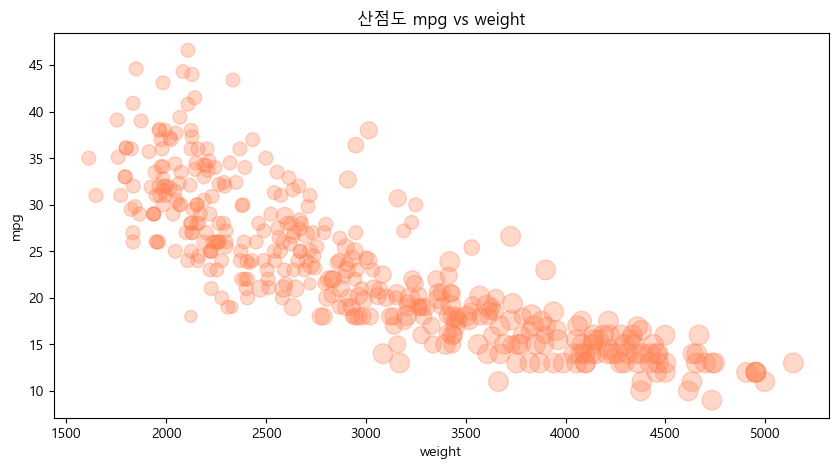

In [22]:
# 3개의 변수로 산점도 그리기

df.plot(
    kind ="scatter", 
    x = "weight",
    y = "mpg", 
    c = "coral", 
    s = cyliders_size, # 실린더 변수를 추가해줬다
    figsize = (10,5),
    alpha = 0.3
)
plt.title("산점도 mpg vs weight")
plt.show()

In [ ]:
# 크기말고 색깔로 구별하려고 한다
cyliders_size = df["cylinders"] / df["cylinders"].max()

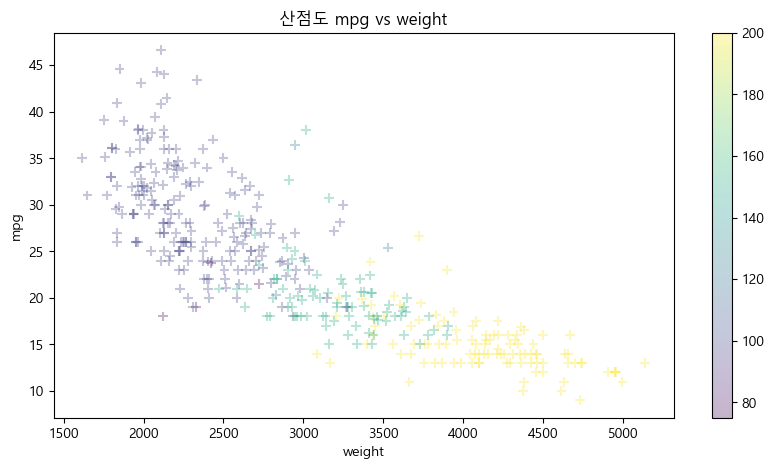

In [28]:

df.plot(
    kind ="scatter", 
    x = "weight",
    y = "mpg", 
    c = cyliders_size, # 색깔에다가 정규화 값을 넣는다
    s = 50, # 대충 50을 넣는다
    figsize = (10,5),
    alpha = 0.3,
    marker = "+",
    cmap = "viridis", # cmap : Color Map
)
plt.title("산점도 mpg vs weight")

# 그래프를 파일로 저장하기
plt.savefig("scatter.png") # 보통 디자인팀에 넘기는데...배경을 투명으로 줘야함
plt.savefig("scatter_transparent.png", transparent = True)

plt.show() # 그래프를 보여주고 닫아버립니다